# Initialization and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("./The Cannabis Depot-2021-07-16-activity-export.csv", dtype={'Cost': 'str'}, low_memory=False)
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], format='%Y-%m-%d %H:%M')


# Data Columns

These are the data points available that we can work with

In [2]:
df.dtypes

Green Bits ID                      object
Transaction Date           datetime64[ns]
Transaction ID                     object
Transaction Type                   object
Product Name                       object
SKU                                object
Category Name                      object
Pricing Tier                       object
Product Type                       object
Concentrate Type                   object
Product Weight (Actual)            object
Quantity                          float64
Cost                               object
Amount                            float64
Account Name                       object
Account Type                       object
Account Sub Type                   object
Discount Name                      object
Device Name                        object
Vendor                             object
Cashier Username                   object
Cashier First Name                 object
Cashier Last Name                  object
Cashier Full Name                 

# Highest Selling Budtenders

Sorted by Quanitity of Product Sold. "Amount" values need to be cleaned up, they currently include both debit and credit accounts.

In [3]:
df.groupby(["Cashier Username"]).sum().sort_values("Quantity", ascending=False)

,Quantity,Amount,Cashier Full Name,Unnamed: 32
Cashier Username,,,,
dmseale,3004.0,1.209699e-12,0.0,0.0
jonwessel,2994.0,1.328715e-12,0.0,0.0
ashleygm,2950.0,1.149303e-12,0.0,0.0
aohmes,2949.0,8.566481e-13,0.0,0.0
rdhansen,2859.0,1.033840e-12,0.0,0.0
nik04,2767.0,1.493916e-12,0.0,0.0
mahlonp,2744.0,5.702105e-13,0.0,0.0
mmcclure,2611.0,1.540101e-12,0.0,0.0
stephont,2419.0,1.250111e-12,0.0,0.0


# Best Selling Products
Best selling products over the period. By quantity of product sold.

In [4]:
df.groupby(["Product Name"]).sum().sort_values("Quantity", ascending=False)

,Quantity,Amount,Cashier Full Name,Unnamed: 32
Product Name,,,,
BFE | Sunshine Daydream,1187.0,-75896.83,0.0,0.0
CCR | Sour Banana,917.0,-54176.10,0.0,0.0
BFE | Banana Runtz,816.0,-45359.68,0.0,0.0
LEAN | Pre Roll |(I) PREZIDENTIAL KUSH,802.0,-4053.01,0.0,0.0
STEALTH | Purple Urkle - Pre-Roll |,794.0,-4078.14,0.0,0.0
...,...,...,...,...
WE | Shatter | (I) Original Glue,1.0,-20.00,0.0,0.0
GLAS | Purple Sunset,1.0,-0.01,0.0,0.0
Glass Pineapple Bong,1.0,-35.00,0.0,0.0


# Summary
Breakdown of Sales Revenue and Tax Revenue by Type

In [5]:
df.groupby(["Account Name"]).sum().sort_values("Amount", ascending=False)

,Quantity,Amount,Cashier Full Name,Unnamed: 32
Account Name,,,,
Cash,0.0,1911094.48,0.0,0.0
Discounts,0.0,150307.15,0.0,0.0
Returns,-15.0,613.67,0.0,0.0
CO State Sales Tax,0.0,-595.21,0.0,0.0
Pueblo County Tax,0.0,-108685.85,0.0,0.0
CO State Tax,0.0,-229193.21,0.0,0.0
Sales,59487.0,-1723541.03,0.0,0.0


# Daily Breakdown

Daily gross sales amount, not incl. tax. Sorted by Sales Amount 

In [11]:
df.index = df['Transaction Date']

#create df containing only Cash account transactions
sales_df = df[df['Account Name'] == 'Cash']


#df[(df['Account Name'] == 'CO State Sales Tax') & (df['Account Name'] == 'Pueblo County Tax') &  (df['Account Name'] == 'CO State Tax')]


#Sum by day and sort descending
sales_by_day = sales_df.groupby(pd.Grouper(freq='D')).sum().sort_values("Transaction Date", ascending=False)
sales_df.groupby(pd.Grouper(freq='D')).sum().sort_values("Amount", ascending=False)




,Quantity,Amount,Cashier Full Name,Unnamed: 32
Transaction Date,,,,
2021-06-11,0.0,80138.57,0.0,0.0
2021-06-04,0.0,80087.84,0.0,0.0
2021-06-05,0.0,79272.38,0.0,0.0
2021-06-12,0.0,76583.64,0.0,0.0
2021-06-25,0.0,76207.55,0.0,0.0
2021-06-26,0.0,74514.21,0.0,0.0
2021-06-18,0.0,72889.03,0.0,0.0
2021-06-19,0.0,72788.00,0.0,0.0
2021-06-13,0.0,68973.63,0.0,0.0


# Total Gross Revenue over the Period

In [12]:
sales_df['Amount'].sum()

1911094.48

<BarContainer object of 30 artists>

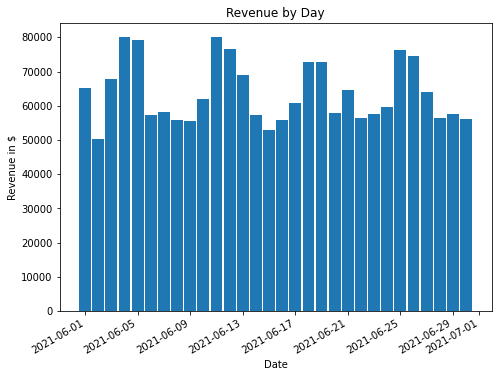

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
width = .90
ax.set_title('Gross Revenue by Day')
ax.set_ylabel('Revenue in $')
ax.set_xlabel('Date')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

days = sales_by_day.index
total_sales = sales_by_day["Amount"]

ax.bar(days, total_sales, width)